# Setup

In [1]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import numpy as np
!cd .. && tree

.
├── 04-19 octobre
│   └── Graphes.ipynb
├── 05-20 octobre
│   ├── Graphes.ipynb
│   ├── Velib01.png
│   ├── Velib_random01.png
│   └── Velib_random02.png
├── 2021 10 15 Analyses 1
│   ├── 2021 10 15 test-5m.csv
│   ├── PremierGraphe.ipynb
│   ├── Scraping.ipynb
│   ├── Scraping.py
│   ├── test-15-1.csv
│   ├── test-5m.csv:Zone.Identifier
│   ├── test.csv
│   ├── Velib01.png
│   └── Velib API.ipynb
├── 2021 10 17 Analyses 2
│   └── EDA 2021 10 17.ipynb
├── 2021 10 18
│   ├── Graphe.ipynb
│   ├── test-30m.csv
│   ├── test-30m.csv:Zone.Identifier
│   ├── Velib01.png
│   ├── Velib02.png
│   ├── Velib03.png
│   ├── Velib04.png
│   └── Velib05.png
├── Data
│   ├── 2021 10 17 30m.csv
│   ├── 2021 10 17 5m.csv
│   ├── 2021 10 19 30m.csv
│   ├── 2021 10 19 5m.csv
│   ├── 2021 10 20 30m.csv
│   ├── test-30m10 19.csv:Zone.Identifier
│   ├── test-30m.csv:Zone.Identifier
│   └── test-5m 10 19.csv:Zone.Identifier
├── Scraping.py
├── test-30m-10-17.csv:Zone.Identifier
├── test-5m-10-17.csv:Zone.Ide

In [2]:
df = pd.read_csv('../Data/2021 10 20 30m.csv')
df.datetime = (pd.to_datetime(df.datetime, format = "%Y-%m-%d %H-%M"))
df = df[df.datetime > np.datetime64('2021-10-15 00:15:00')]
print(df.shape, df.datetime.min(), df.datetime.max())
df.sample(3)

(392395, 5) 2021-10-15 06:00:00 2021-10-20 23:00:00


,datetime,stationCode,meca,elec,park
159651,2021-10-17 13:30:00,20117,0,1,32
83122,2021-10-16 11:00:00,8053,2,1,26
80501,2021-10-16 10:00:00,10113,5,1,34


In [3]:
df.dtypes

datetime       datetime64[ns]
stationCode             int64
meca                    int64
elec                    int64
park                    int64
dtype: object

In [4]:
df_means = df.groupby("stationCode").mean();df_means.sample(3)

,meca,elec,park
stationCode,,,
35008,2.306569,2.047445,23.364964
12004,22.791971,1.828467,5.547445
17111,3.372263,0.916058,19.218978


<AxesSubplot:xlabel='datetime'>

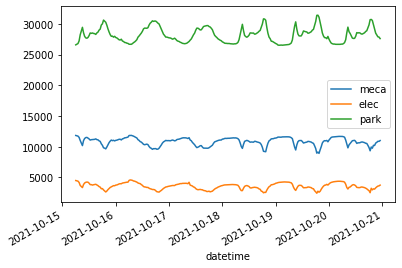

In [10]:
df.groupby("datetime").sum()[["meca", "elec", "park"]].plot()

<AxesSubplot:xlabel='datetime'>

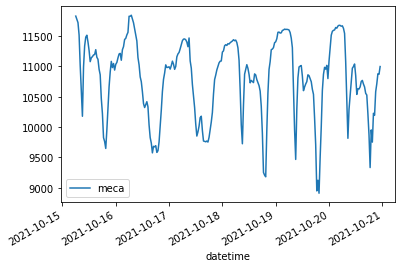

In [11]:
df.groupby("datetime").sum()[["meca"]].plot()

# Distribution des moyennes

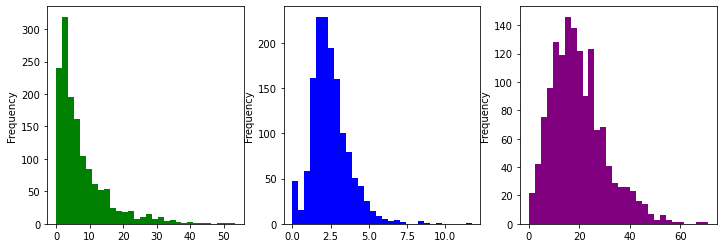

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
axs = axs.flat
df_means.meca.plot.hist(bins = 30, color = 'green', ax = axs[0])
df_means.elec.plot.hist(bins = 30, color = 'blue', ax = axs[1])
df_means.park.plot.hist(bins = 30, color = 'purple', ax = axs[2]);

# Home subset

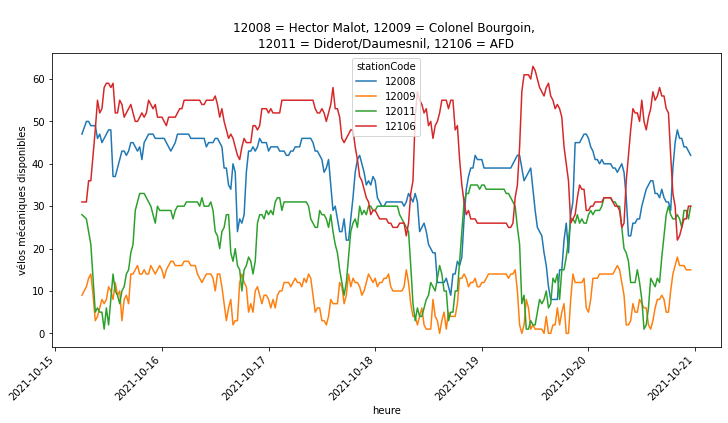

In [6]:
df_home = df[df.stationCode.isin([12008, 12009, 12106, 12011,])]
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot()
df_home.pivot_table(
    values="meca", 
    index="datetime", 
    columns="stationCode").plot(xlabel = "heure", 
                                ylabel = 'vélos mécaniques disponibles', 
                                ax = ax,
                                title = """
12008 = Hector Malot, 12009 = Colonel Bourgoin, 
12011 = Diderot/Daumesnil, 12106 = AFD""");
ax = plt.gca()
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

plt.savefig("Velib01.png")

# Random choices

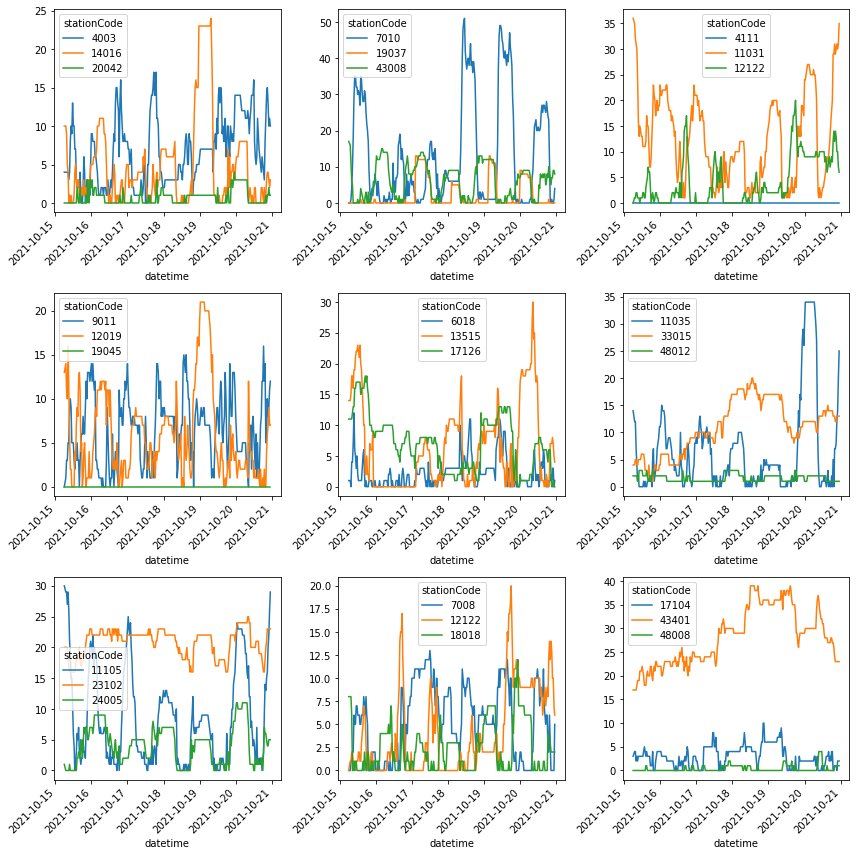

In [12]:
fig, axs = plt.subplots(3,3, figsize = (12, 12))
for ax in axs.flat:
    random_list = df.sample(3).stationCode.tolist() 
    (df[df.stationCode.isin(random_list)]
                .pivot_table(
                    values="meca", 
                    index="datetime", 
                    columns="stationCode")
                .plot(ax = ax,))
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
fig.tight_layout()
plt.savefig("Velib_random02.png");

In [21]:
df.groupby("stationCode").max()[["meca"]].sort_values(by = 'meca', ascending = False)

,meca
stationCode,
8004,73
15030,66
12033,65
12108,65
15059,64
...,...
15126,0
23202,0
1122,0


array([[<AxesSubplot:title={'center':'meca'}>]], dtype=object)

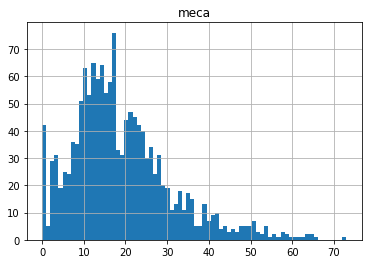

In [22]:
df.groupby("stationCode").max()[["meca"]].sort_values(by = 'meca', ascending = False).hist(bins = 74)

In [39]:
df_max = df.groupby("stationCode").max()[["meca"]]
big_station_list = list(df_max[(df_max.meca >50)].index)
big_station_list
df = df[df.stationCode.isin(big_station_list)]

In [42]:
len(big_station_list)

36

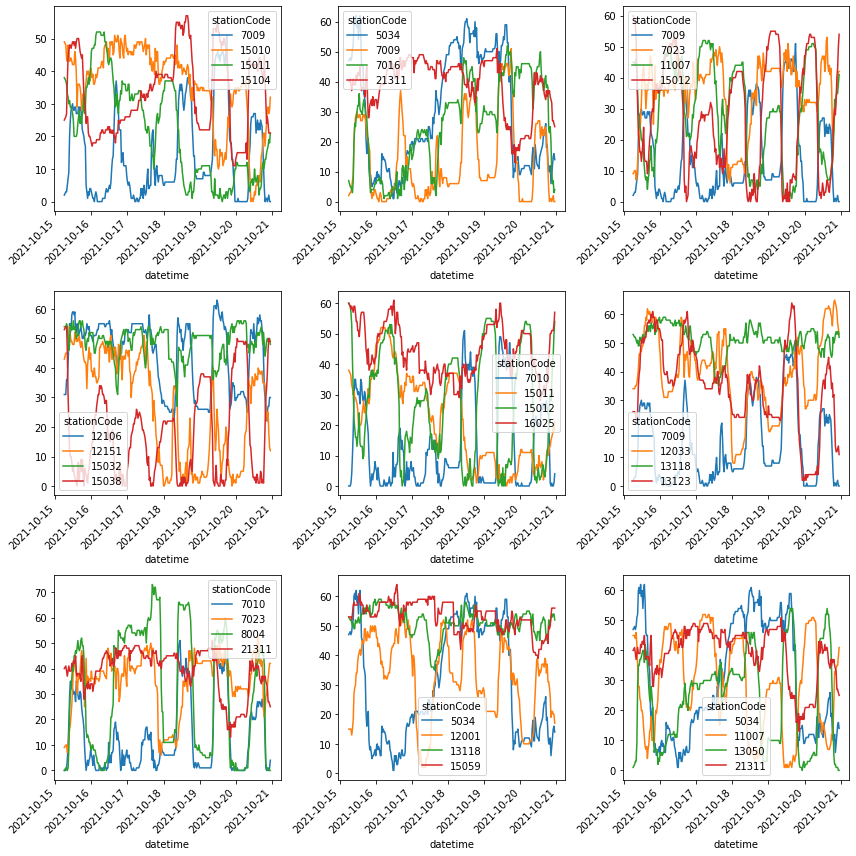

In [43]:
fig, axs = plt.subplots(3,3, figsize = (12, 12))
for ax in axs.flat:
    random_list = df.sample(4).stationCode.tolist() 
    (df[df.stationCode.isin(random_list)]
                .pivot_table(
                    values="meca", 
                    index="datetime", 
                    columns="stationCode")
                .plot(ax = ax,))
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
fig.tight_layout()
plt.savefig("Velib_random02.png");

In [62]:
df = df[df.datetime.dt.weekday <5] # jours de la semaine
df['hour'] = df.datetime.dt.hour # colonne heure

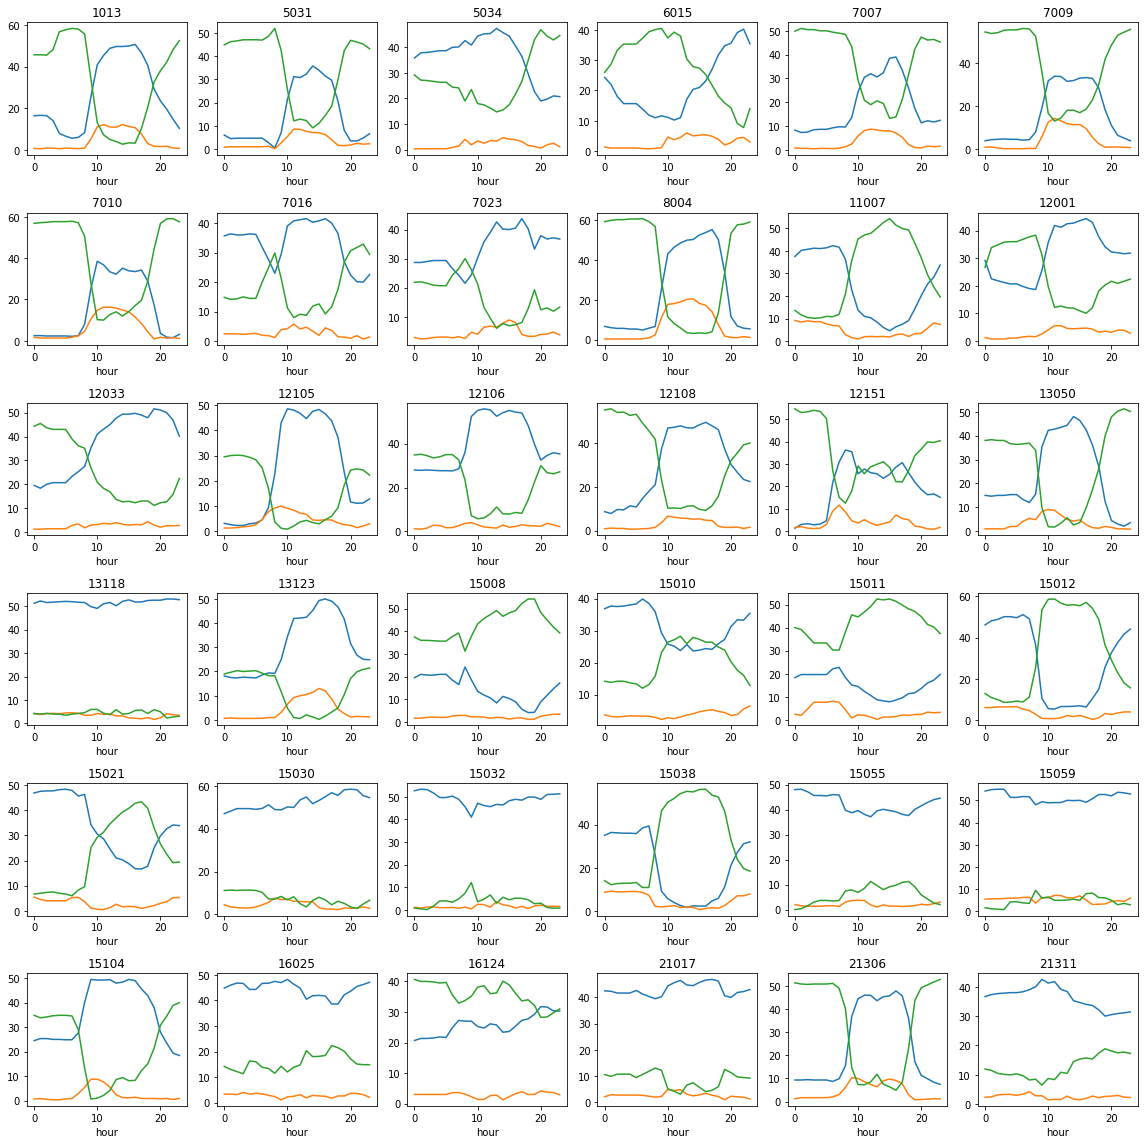

In [63]:
fig, axs = plt.subplots(6,6, figsize = (16,16))
for station, ax in zip(big_station_list, axs.flat):
    df.groupby(['stationCode', 'hour']).mean().loc[station,:].plot(ax=ax, title = str(station), legend = None)
fig.tight_layout()

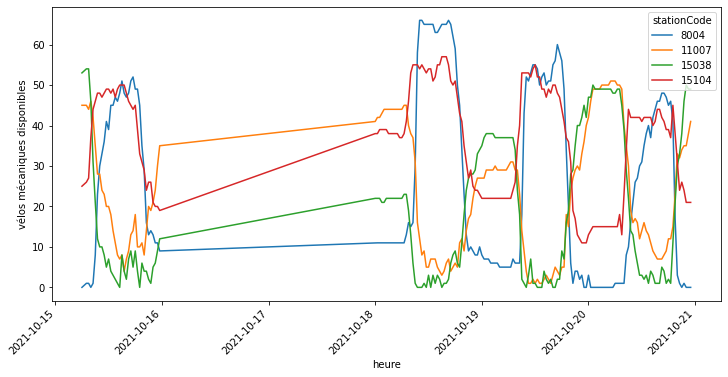

In [64]:


df_sub = df[df.stationCode.isin([15038, 15104, 8004,11007])]
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot()
df_sub.pivot_table(
    values="meca", 
    index="datetime", 
    columns="stationCode").plot(xlabel = "heure", 
                                ylabel = 'vélos mécaniques disponibles', 
                                ax = ax,
                                );
ax = plt.gca()
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
